**Research Question:**
“Do improvements in education predict higher economic growth?”

**Hypothesis:**

Null-hypothesis:
**average years of schooling** have no relation to **GDP per capita**

Alternative:
average years of schooling have a relation to GDP per capita


We set our **focus on causality** instead of ML methods


**Structure:**
0. Preparing/ Merging the dataset
1. Observing the dataset
2. Simplye OLS Regression
3. Testing on Causality
4. Testing for different Subgroups
5. Summary, limitations, further research
6. Appendix - Some considerations and testing of ML on this dataset


Data Sources: https://raw.githubusercontent.com/AStauch/GroupWork_EEMP_NameResearchQuestion/refs/heads/main/Data/0.Data%20Sources%20and%20Variables.txt


# 0. Preparing/Merging the datasets

In [1]:
!pip install pyfixest -q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyfixest as pf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.0 MB/s eta 0:00:00


In [2]:
path_to_data = "https://raw.githubusercontent.com/AStauch/GroupWork_EEMP_NameResearchQuestion/refs/heads/main/Data/combined_gdp_education_data.csv"
df = pd.read_csv(path_to_data)
df

,Country Name,Country Code,Year,GDP_PPP,Average years of schooling
0,Afghanistan,AFG,1999,NaN,1.228940
1,Albania,ALB,1999,3471.667789,8.472385
2,Algeria,DZA,1999,8813.539568,6.424954
3,Angola,AGO,1999,3221.132886,3.387043
4,Argentina,ARG,1999,11508.157050,8.732238
...,...,...,...,...,...
4037,Vanuatu,VUT,2022,3203.616623,7.183210
4038,Venezuela,VEN,2022,NaN,9.628155
4039,Yemen,YEM,2022,NaN,2.776826
4040,Zambia,ZMB,2022,3864.894367,7.284893


In [3]:
df["Country Name"].nunique()

173

In [4]:
# just checking for how many NaN values are here
nan_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with NaN values: {nan_rows}")

Number of rows with NaN values: 57


In [5]:
# Print rows with NaN values
nan_rows_df = df[df.isnull().any(axis=1)]
print("\nRows with NaN values:")
print(nan_rows_df)


Rows with NaN values:
      Country Name Country Code  Year  GDP_PPP  Average years of schooling
0      Afghanistan          AFG  1999      NaN                    1.228940
37        Djibouti          DJI  1999      NaN                    1.806402
188       Djibouti          DJI  2000      NaN                    1.879177
349       Djibouti          DJI  2001      NaN                    1.954883
510       Djibouti          DJI  2002      NaN                    2.033639
672       Djibouti          DJI  2003      NaN                    2.115568
836       Djibouti          DJI  2004      NaN                    2.200798
1001      Djibouti          DJI  2005      NaN                    2.289462
1170      Djibouti          DJI  2006      NaN                    2.381697
1339      Djibouti          DJI  2007      NaN                    2.477648
1508      Djibouti          DJI  2008      NaN                    2.577466
1678      Djibouti          DJI  2009      NaN                    2.681304
18

In [6]:
 df = df.rename(columns={"Country Name": "Country",
                         "Country Code":"CountryCode",
                         "Average years of schooling":"AvYearsSchooling"})
 df

,Country,CountryCode,Year,GDP_PPP,AvYearsSchooling
0,Afghanistan,AFG,1999,NaN,1.228940
1,Albania,ALB,1999,3471.667789,8.472385
2,Algeria,DZA,1999,8813.539568,6.424954
3,Angola,AGO,1999,3221.132886,3.387043
4,Argentina,ARG,1999,11508.157050,8.732238
...,...,...,...,...,...
4037,Vanuatu,VUT,2022,3203.616623,7.183210
4038,Venezuela,VEN,2022,NaN,9.628155
4039,Yemen,YEM,2022,NaN,2.776826
4040,Zambia,ZMB,2022,3864.894367,7.284893


In [7]:
path_to_continent = "https://raw.githubusercontent.com/AStauch/GroupWork_EEMP_NameResearchQuestion/refs/heads/main/Data/CountriesByContinents.csv"
df2 = pd.read_csv(path_to_continent)
df2

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
191,South America,Paraguay
192,South America,Peru
193,South America,Suriname
194,South America,Uruguay


In [8]:
path_to_incomeGroup = "https://raw.githubusercontent.com/AStauch/GroupWork_EEMP_NameResearchQuestion/refs/heads/main/Data/CountryIncomeGroups_adjusted.csv"
df3 = pd.read_csv(path_to_incomeGroup)
df3

,CountryCode,Country,Year,IncomeGroup
0,AFG,Afghanistan,1999,L
1,AFG,Afghanistan,2000,L
2,AFG,Afghanistan,2001,L
3,AFG,Afghanistan,2002,L
4,AFG,Afghanistan,2003,L
...,...,...,...,...
5045,YUG,Serbia and Montenegro (former),2001,LM
5046,YUG,Serbia and Montenegro (former),2002,LM
5047,YUG,Serbia and Montenegro (former),2003,LM
5048,YUG,Serbia and Montenegro (former),2004,LM


In [9]:
#creating educationLevel variable from dataset
def categorize_education(AvYearsSchooling):
    if AvYearsSchooling <= 5:
        return "Low"
    elif 5 < AvYearsSchooling <= 10:
        return "Middle"
    else:
        return "High"

df["educationLevel"] = df["AvYearsSchooling"].apply(categorize_education)
print(df)

          Country CountryCode  Year       GDP_PPP  AvYearsSchooling  \
0     Afghanistan         AFG  1999           NaN          1.228940   
1         Albania         ALB  1999   3471.667789          8.472385   
2         Algeria         DZA  1999   8813.539568          6.424954   
3          Angola         AGO  1999   3221.132886          3.387043   
4       Argentina         ARG  1999  11508.157050          8.732238   
...           ...         ...   ...           ...               ...   
4037      Vanuatu         VUT  2022   3203.616623          7.183210   
4038    Venezuela         VEN  2022           NaN          9.628155   
4039        Yemen         YEM  2022           NaN          2.776826   
4040       Zambia         ZMB  2022   3864.894367          7.284893   
4041     Zimbabwe         ZWE  2022   3660.835501          8.807762   

     educationLevel  
0               Low  
1            Middle  
2            Middle  
3               Low  
4            Middle  
...            

In [10]:
df

,Country,CountryCode,Year,GDP_PPP,AvYearsSchooling,educationLevel
0,Afghanistan,AFG,1999,NaN,1.228940,Low
1,Albania,ALB,1999,3471.667789,8.472385,Middle
2,Algeria,DZA,1999,8813.539568,6.424954,Middle
3,Angola,AGO,1999,3221.132886,3.387043,Low
4,Argentina,ARG,1999,11508.157050,8.732238,Middle
...,...,...,...,...,...,...
4037,Vanuatu,VUT,2022,3203.616623,7.183210,Middle
4038,Venezuela,VEN,2022,NaN,9.628155,Middle
4039,Yemen,YEM,2022,NaN,2.776826,Low
4040,Zambia,ZMB,2022,3864.894367,7.284893,Middle


In [11]:
path_to_lifeExp = "https://raw.githubusercontent.com/AStauch/GroupWork_EEMP_NameResearchQuestion/refs/heads/main/Data/life_expectancy_1999-2022.csv"
df4 = pd.read_csv(path_to_lifeExp)
df4

,Country,CountryCode,Year,LifeExp
0,Aruba,ABW,1999,73.561
1,Aruba,ABW,2000,73.569
2,Aruba,ABW,2001,73.647
3,Aruba,ABW,2002,73.726
4,Aruba,ABW,2003,73.752
...,...,...,...,...
5249,Zimbabwe,ZWE,2018,61.414
5250,Zimbabwe,ZWE,2019,61.292
5251,Zimbabwe,ZWE,2020,61.124
5252,Zimbabwe,ZWE,2021,59.253


In [12]:
path_to_urbanization = "https://raw.githubusercontent.com/AStauch/GroupWork_EEMP_NameResearchQuestion/refs/heads/main/Data/share-of-urban-population_1999-2022.csv"
df5 = pd.read_csv(path_to_urbanization)
df5

,Country,CountryCode,Year,Urbanization
0,Afghanistan,AFG,1999,21.986
1,Afghanistan,AFG,2000,22.078
2,Afghanistan,AFG,2001,22.169
3,Afghanistan,AFG,2002,22.261
4,Afghanistan,AFG,2003,22.353
...,...,...,...,...
5155,Zimbabwe,ZWE,2018,32.209
5156,Zimbabwe,ZWE,2019,32.210
5157,Zimbabwe,ZWE,2020,32.242
5158,Zimbabwe,ZWE,2021,32.303


In [13]:
path_to_unemployment = "https://raw.githubusercontent.com/AStauch/GroupWork_EEMP_NameResearchQuestion/refs/heads/main/Data/unemployment-rate_1999-2022.csv"
df6 = pd.read_csv(path_to_unemployment)
df6

,Country,CountryCode,Year,UnemploymentRate
0,Afghanistan,AFG,1999,7.942
1,Afghanistan,AFG,2000,7.942
2,Afghanistan,AFG,2001,7.942
3,Afghanistan,AFG,2002,7.935
4,Afghanistan,AFG,2003,7.929
...,...,...,...,...
4818,Zimbabwe,ZWE,2018,6.767
4819,Zimbabwe,ZWE,2019,7.370
4820,Zimbabwe,ZWE,2020,8.651
4821,Zimbabwe,ZWE,2021,9.540


In [14]:
df_merged =pd.merge(df, df2, on=["Country"], how="inner")
df_merged =pd.merge(df_merged, df3, on=["Country", "Year"], how="inner")
df_merged =pd.merge(df_merged, df4, on=["Country", "Year"], how="inner")
df_merged =df_merged.drop(columns=["CountryCode_x", "CountryCode_y"])
df_merged =pd.merge(df_merged, df5, on=["Country", "Year"], how="inner")
df_merged =df_merged.drop(columns=["CountryCode_x", "CountryCode_y"])
df_merged =pd.merge(df_merged, df6, on=["Country", "Year"], how="inner")
df_merged

,Country,Year,GDP_PPP,AvYearsSchooling,educationLevel,Continent,IncomeGroup,LifeExp,Urbanization,CountryCode,UnemploymentRate
0,Afghanistan,1999,NaN,1.228940,Low,Asia,L,54.846,21.986,AFG,7.942
1,Albania,1999,3471.667789,8.472385,Middle,Europe,LM,75.183,41.169,ALB,20.840
2,Algeria,1999,8813.539568,6.424954,Middle,Africa,LM,70.032,59.118,DZA,28.542
3,Angola,1999,3221.132886,3.387043,Low,Africa,L,45.386,48.897,AGO,16.430
4,Argentina,1999,11508.157050,8.732238,Middle,South America,UM,73.722,88.952,ARG,14.050
...,...,...,...,...,...,...,...,...,...,...,...
3634,Uzbekistan,2022,9042.343916,11.911150,High,Asia,LM,71.674,50.466,UZB,4.507
3635,Vanuatu,2022,3203.616623,7.183210,Middle,Oceania,LM,70.492,25.816,VUT,5.219
3636,Yemen,2022,NaN,2.776826,Low,Asia,L,63.720,39.188,YEM,17.613
3637,Zambia,2022,3864.894367,7.284893,Middle,Africa,LM,61.803,45.761,ZMB,4.374


In [15]:
nan_rows = df_merged.isnull().any(axis=1).sum() # filter for NaN rows
print(f"Number of rows with NaN values: {nan_rows}") # print them out

Number of rows with NaN values: 53


In [16]:
df_merged = df_merged.dropna() # drop NaN values
print(df_merged.shape[0]) # inspect how many observations are remaining

3586


In [17]:
print(df_merged.columns)

Index(['Country', 'Year', 'GDP_PPP', 'AvYearsSchooling', 'educationLevel',
       'Continent', 'IncomeGroup', 'LifeExp', 'Urbanization', 'CountryCode',
       'UnemploymentRate'],
      dtype='object')


In [18]:
df_merged["Country"].nunique()

156

In [19]:
df_merged

,Country,Year,GDP_PPP,AvYearsSchooling,educationLevel,Continent,IncomeGroup,LifeExp,Urbanization,CountryCode,UnemploymentRate
1,Albania,1999,3471.667789,8.472385,Middle,Europe,LM,75.183,41.169,ALB,20.840
2,Algeria,1999,8813.539568,6.424954,Middle,Africa,LM,70.032,59.118,DZA,28.542
3,Angola,1999,3221.132886,3.387043,Low,Africa,L,45.386,48.897,AGO,16.430
4,Argentina,1999,11508.157050,8.732238,Middle,South America,UM,73.722,88.952,ARG,14.050
5,Armenia,1999,2347.799582,10.418350,High,Europe,L,70.257,64.947,ARM,11.200
...,...,...,...,...,...,...,...,...,...,...,...
3633,Uruguay,2022,32746.315280,9.058220,Middle,South America,H,78.000,95.688,URY,7.870
3634,Uzbekistan,2022,9042.343916,11.911150,High,Asia,LM,71.674,50.466,UZB,4.507
3635,Vanuatu,2022,3203.616623,7.183210,Middle,Oceania,LM,70.492,25.816,VUT,5.219
3637,Zambia,2022,3864.894367,7.284893,Middle,Africa,LM,61.803,45.761,ZMB,4.374


In [20]:
df_merged = df_merged.drop(columns=["CountryCode"])

In [21]:
df_merged

,Country,Year,GDP_PPP,AvYearsSchooling,educationLevel,Continent,IncomeGroup,LifeExp,Urbanization,UnemploymentRate
1,Albania,1999,3471.667789,8.472385,Middle,Europe,LM,75.183,41.169,20.840
2,Algeria,1999,8813.539568,6.424954,Middle,Africa,LM,70.032,59.118,28.542
3,Angola,1999,3221.132886,3.387043,Low,Africa,L,45.386,48.897,16.430
4,Argentina,1999,11508.157050,8.732238,Middle,South America,UM,73.722,88.952,14.050
5,Armenia,1999,2347.799582,10.418350,High,Europe,L,70.257,64.947,11.200
...,...,...,...,...,...,...,...,...,...,...
3633,Uruguay,2022,32746.315280,9.058220,Middle,South America,H,78.000,95.688,7.870
3634,Uzbekistan,2022,9042.343916,11.911150,High,Asia,LM,71.674,50.466,4.507
3635,Vanuatu,2022,3203.616623,7.183210,Middle,Oceania,LM,70.492,25.816,5.219
3637,Zambia,2022,3864.894367,7.284893,Middle,Africa,LM,61.803,45.761,4.374


In [22]:
df_merged["Log_GDP_PPP"] = np.log(df_merged["GDP_PPP"])
df_merged

,Country,Year,GDP_PPP,AvYearsSchooling,educationLevel,Continent,IncomeGroup,LifeExp,Urbanization,UnemploymentRate,Log_GDP_PPP
1,Albania,1999,3471.667789,8.472385,Middle,Europe,LM,75.183,41.169,20.840,8.152390
2,Algeria,1999,8813.539568,6.424954,Middle,Africa,LM,70.032,59.118,28.542,9.084044
3,Angola,1999,3221.132886,3.387043,Low,Africa,L,45.386,48.897,16.430,8.077488
4,Argentina,1999,11508.157050,8.732238,Middle,South America,UM,73.722,88.952,14.050,9.350811
5,Armenia,1999,2347.799582,10.418350,High,Europe,L,70.257,64.947,11.200,7.761234
...,...,...,...,...,...,...,...,...,...,...,...
3633,Uruguay,2022,32746.315280,9.058220,Middle,South America,H,78.000,95.688,7.870,10.396546
3634,Uzbekistan,2022,9042.343916,11.911150,High,Asia,LM,71.674,50.466,4.507,9.109674
3635,Vanuatu,2022,3203.616623,7.183210,Middle,Oceania,LM,70.492,25.816,5.219,8.072036
3637,Zambia,2022,3864.894367,7.284893,Middle,Africa,LM,61.803,45.761,4.374,8.259690


In [23]:
df_merged.to_csv('combined_gdp_education_data_final.csv', index=False) # Creating .csv-File

In [24]:
from google.colab import files  # Downloading .csv-File
files.download('combined_gdp_education_data_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
dummies =pd.get_dummies(df_merged, columns=["Country", "Continent", "IncomeGroup", "educationLevel"]) # creating dummies for the non-numerical values -> making dummies, e.g., for each country

df_with_dummies = pd.concat([df_merged, dummies], axis=1)
df_with_dummies

,Country,Year,GDP_PPP,AvYearsSchooling,educationLevel,Continent,IncomeGroup,LifeExp,Urbanization,UnemploymentRate,...,Continent_North America,Continent_Oceania,Continent_South America,IncomeGroup_H,IncomeGroup_L,IncomeGroup_LM,IncomeGroup_UM,educationLevel_High,educationLevel_Low,educationLevel_Middle
1,Albania,1999,3471.667789,8.472385,Middle,Europe,LM,75.183,41.169,20.840,...,False,False,False,False,False,True,False,False,False,True
2,Algeria,1999,8813.539568,6.424954,Middle,Africa,LM,70.032,59.118,28.542,...,False,False,False,False,False,True,False,False,False,True
3,Angola,1999,3221.132886,3.387043,Low,Africa,L,45.386,48.897,16.430,...,False,False,False,False,True,False,False,False,True,False
4,Argentina,1999,11508.157050,8.732238,Middle,South America,UM,73.722,88.952,14.050,...,False,False,True,False,False,False,True,False,False,True
5,Armenia,1999,2347.799582,10.418350,High,Europe,L,70.257,64.947,11.200,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,Uruguay,2022,32746.315280,9.058220,Middle,South America,H,78.000,95.688,7.870,...,False,False,True,True,False,False,False,False,False,True
3634,Uzbekistan,2022,9042.343916,11.911150,High,Asia,LM,71.674,50.466,4.507,...,False,False,False,False,False,True,False,True,False,False
3635,Vanuatu,2022,3203.616623,7.183210,Middle,Oceania,LM,70.492,25.816,5.219,...,False,True,False,False,False,True,False,False,False,True
3637,Zambia,2022,3864.894367,7.284893,Middle,Africa,LM,61.803,45.761,4.374,...,False,False,False,False,False,True,False,False,False,True


In [26]:
df_merged

,Country,Year,GDP_PPP,AvYearsSchooling,educationLevel,Continent,IncomeGroup,LifeExp,Urbanization,UnemploymentRate,Log_GDP_PPP
1,Albania,1999,3471.667789,8.472385,Middle,Europe,LM,75.183,41.169,20.840,8.152390
2,Algeria,1999,8813.539568,6.424954,Middle,Africa,LM,70.032,59.118,28.542,9.084044
3,Angola,1999,3221.132886,3.387043,Low,Africa,L,45.386,48.897,16.430,8.077488
4,Argentina,1999,11508.157050,8.732238,Middle,South America,UM,73.722,88.952,14.050,9.350811
5,Armenia,1999,2347.799582,10.418350,High,Europe,L,70.257,64.947,11.200,7.761234
...,...,...,...,...,...,...,...,...,...,...,...
3633,Uruguay,2022,32746.315280,9.058220,Middle,South America,H,78.000,95.688,7.870,10.396546
3634,Uzbekistan,2022,9042.343916,11.911150,High,Asia,LM,71.674,50.466,4.507,9.109674
3635,Vanuatu,2022,3203.616623,7.183210,Middle,Oceania,LM,70.492,25.816,5.219,8.072036
3637,Zambia,2022,3864.894367,7.284893,Middle,Africa,LM,61.803,45.761,4.374,8.259690


# 1. Observing the dataset

We plot different graphs to get a feeling for the data.

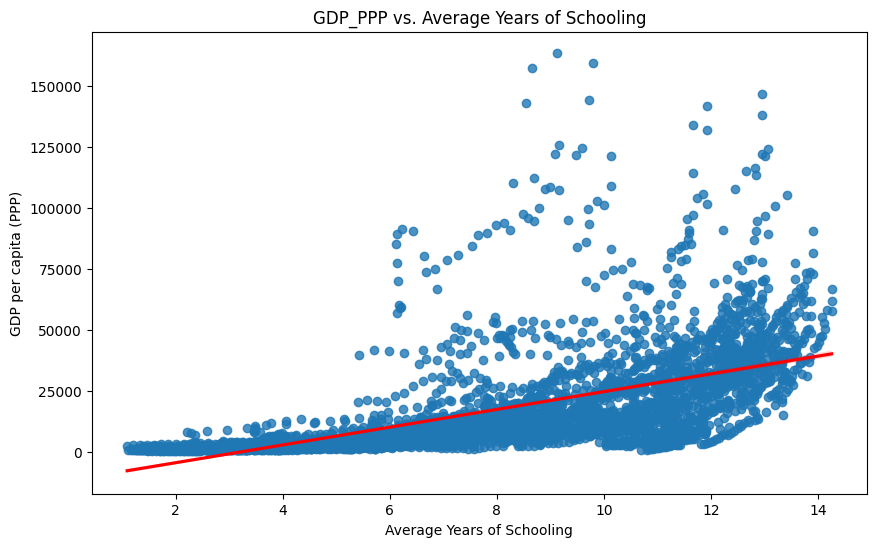

In [27]:
# Regression plot for GDP on Average Years of Schooling
plt.figure(figsize=(10, 6))
sns.regplot(x="AvYearsSchooling", y="GDP_PPP", data=df_merged, line_kws={"color": "red"})
plt.xlabel("Average Years of Schooling")
plt.ylabel("GDP per capita (PPP)")
plt.title("GDP_PPP vs. Average Years of Schooling")
plt.show()

## seems like on average there is a positve relation between AvYearsSchooling and GDP_PPP

<Axes: title={'center': 'Average Schooling Years by Continent'}, xlabel='Continent'>

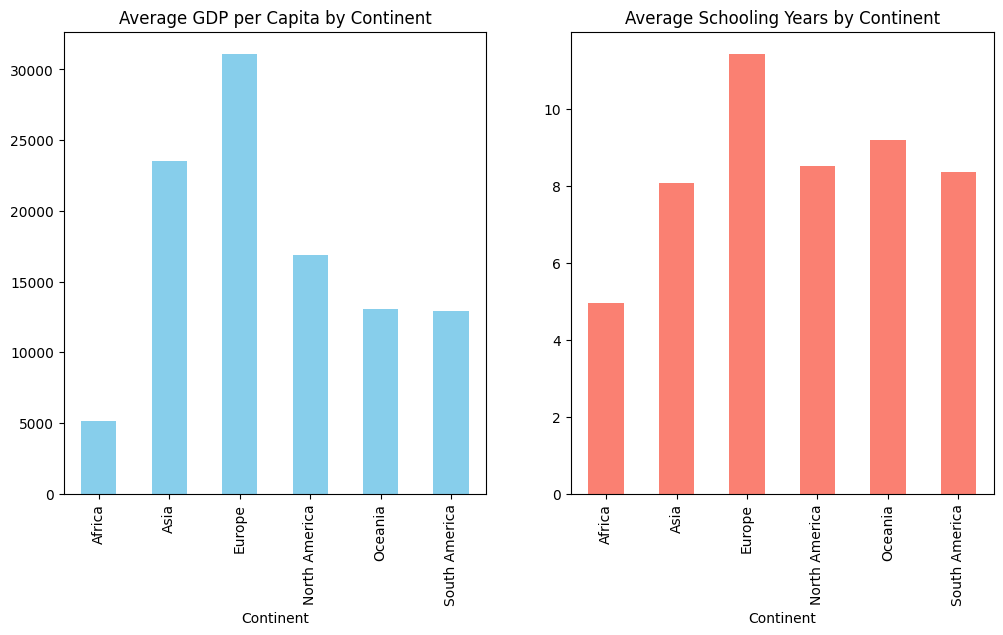

In [28]:
continent_means = df_merged.groupby('Continent')[['GDP_PPP', 'AvYearsSchooling']].mean()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Bar chart for Average GDP per Capita by Continent
continent_means['GDP_PPP'].plot(kind='bar', ax=axes[0], color='skyblue', title="Average GDP per Capita by Continent")

## on average, GDP varies a lot by continent


# Bar chart for Average Schooling Years by Continent
continent_means['AvYearsSchooling'].plot(kind='bar', ax=axes[1], color='salmon', title="Average Schooling Years by Continent")

## on average, AvYearsSchooling varies a lot by continent (bus less then the GDP per continent)

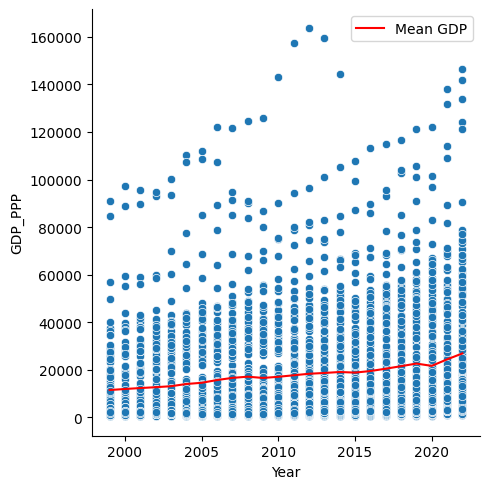

In [29]:
sns.relplot(x="Year", y="GDP_PPP", data=df_merged) # creating a relplot for GDP for all countires from 1999-2022
mean_gdp_by_year = df.groupby("Year")["GDP_PPP"].mean()  # creating a variable for mean GDP of all countries for all years
plt.plot(mean_gdp_by_year.index, mean_gdp_by_year.values, label="Mean GDP", color="red")  # ploting the mean
plt.legend() # adding legend for Mean GDP
plt.show()

## on average, there seems to be a positive trend for GDP_PPP

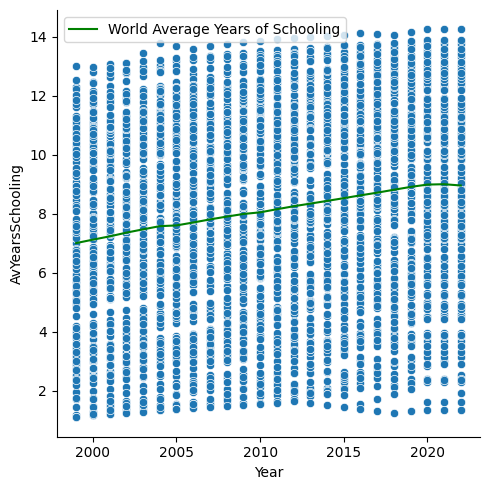

In [30]:
sns.relplot(x="Year", y="AvYearsSchooling", data=df_merged) # creating a relplot for Average years of schooling for all countires from 1999-2022
world_AvYearsSchooling = df.groupby("Year")["AvYearsSchooling"].mean()  # creating a variable for mean Average years of Schooling of all countries for all years
plt.plot(world_AvYearsSchooling.index, world_AvYearsSchooling.values, label="World Average Years of Schooling", color="green")  #ploting the mean
plt.legend() #adding legend for Mean/World Average Years of Schooling
plt.show()

## on average, there seems to be a positive trend for AvYearsSchooling

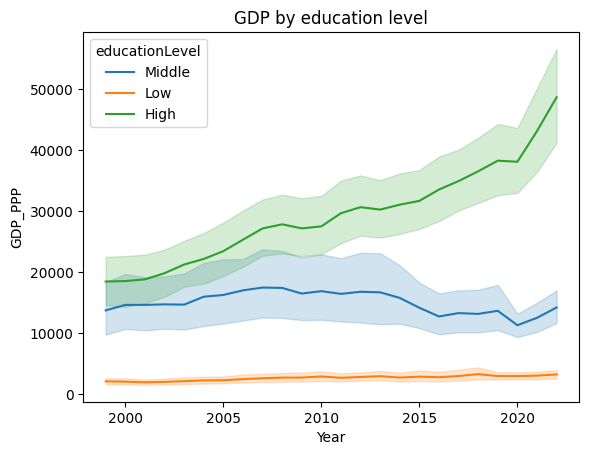

In [31]:
#checking the relation of GDP_PPP for different education levels
sns.lineplot(x="Year", y="GDP_PPP", hue="educationLevel", data=df_merged)
plt.title("GDP by education level")
plt.xlabel("Year")
plt.ylabel("GDP_PPP")
plt.legend(title="educationLevel")
plt.show()

## High Education levels are associated with the strongest increase in GDP_PPP on average

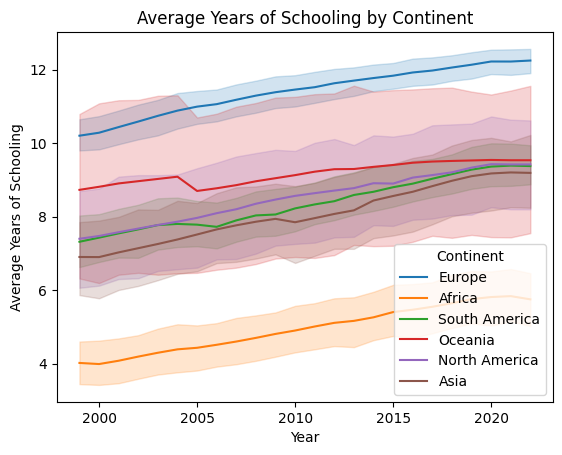

In [32]:
#Checking the relation for AvYearsSchooling for different continents, on average
sns.lineplot(x="Year", y="AvYearsSchooling", hue="Continent", data=df_merged)
plt.title("Average Years of Schooling by Continent")
plt.xlabel("Year")
plt.ylabel("Average Years of Schooling")
plt.legend(title="Continent")
plt.show()

## the average years of schooling increase for each continent over time, but from some the increase in AvSchoolYears is stronger

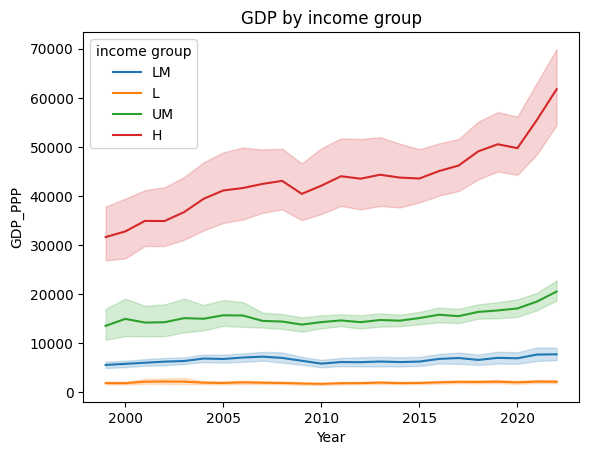

In [33]:
#Checking the relation for AvYearsSchooling for different continents, on average
sns.lineplot(x="Year", y="GDP_PPP", hue="IncomeGroup", data=df_merged)
plt.title("GDP by income group")
plt.xlabel("Year")
plt.ylabel("GDP_PPP")
plt.legend(title="income group")
plt.show()

## higher income have a stronger trend in increasing GDP_ppp

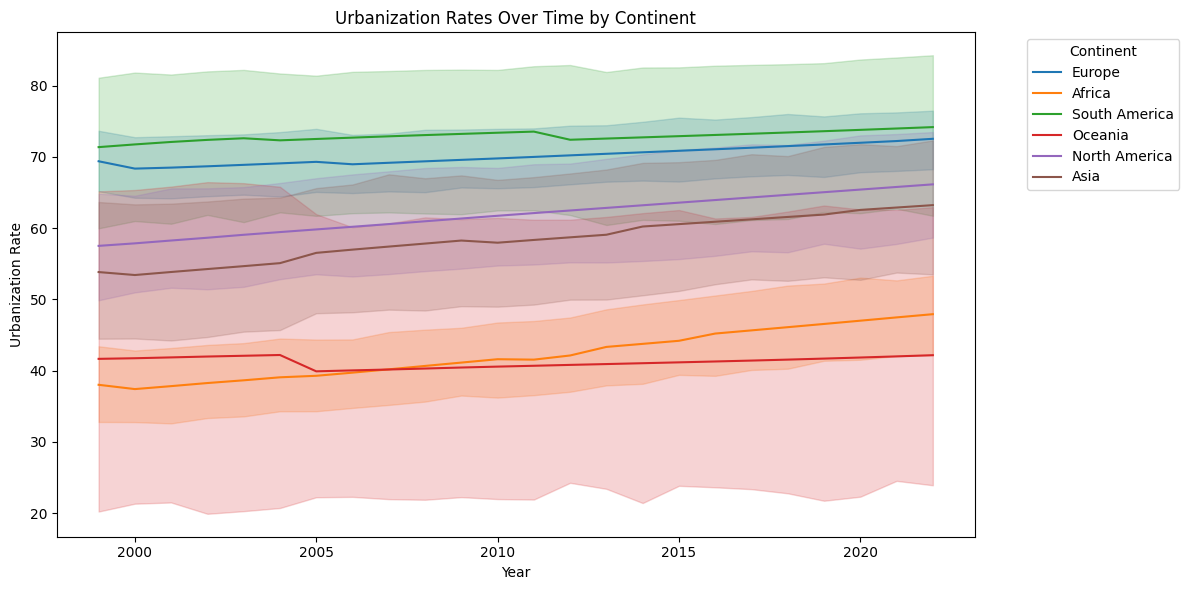

In [34]:
# Plot urbanization trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Urbanization', hue='Continent', data=df_merged, palette='tab10')
plt.title('Urbanization Rates Over Time by Continent')
plt.ylabel('Urbanization Rate')
plt.xlabel('Year')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()


## overall, the share of people living on urban areas increases; some countries are susbantially lower urbanized then others

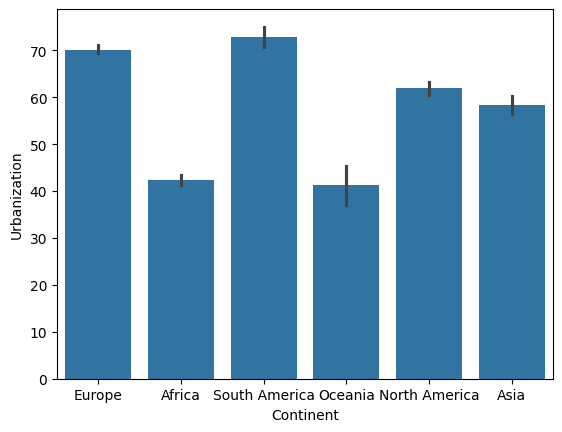

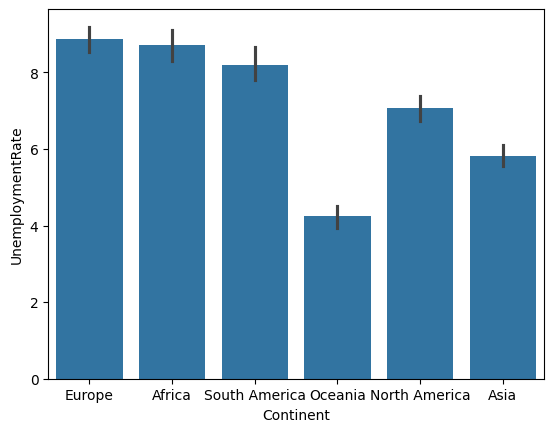

In [35]:
# Plotting barplot for the average urbanization and unemployment rate by continent
sns.barplot(x='Continent', y='Urbanization', data=df_merged)
plt.show()
sns.barplot(x='Continent', y='UnemploymentRate', data=df_merged)
plt.show()

## just getting a feeling for the distribution

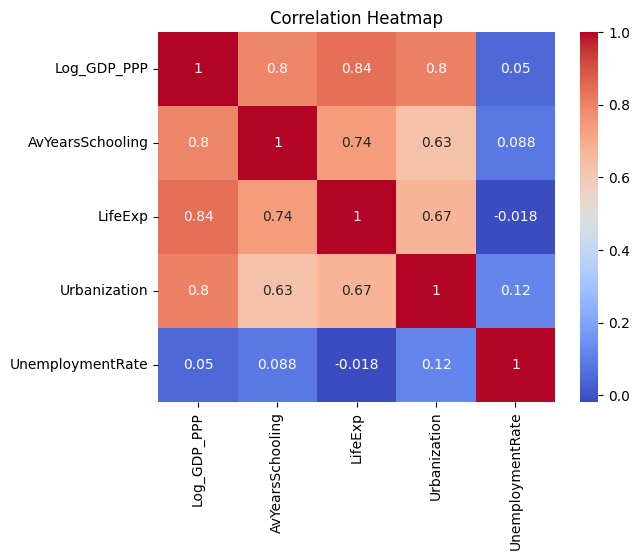

In [36]:
# Plotting a correlation matrix as a heatmap
sns.heatmap(df_merged[['Log_GDP_PPP', 'AvYearsSchooling', 'LifeExp','Urbanization', 'UnemploymentRate']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## strong to very strong positive correlations for many variables except of UnemploymentRate, which has small (and once negative) correlations
# high correlation could hint towards multicollinearity issue in further regression steps... it makes it more difficult to truly argue in the sense of "increasing x by one unit all else equal", potentially leading to high standard errors (bigger variations)
# but we dont have perfect multicollinearity, so we can continue at this step...

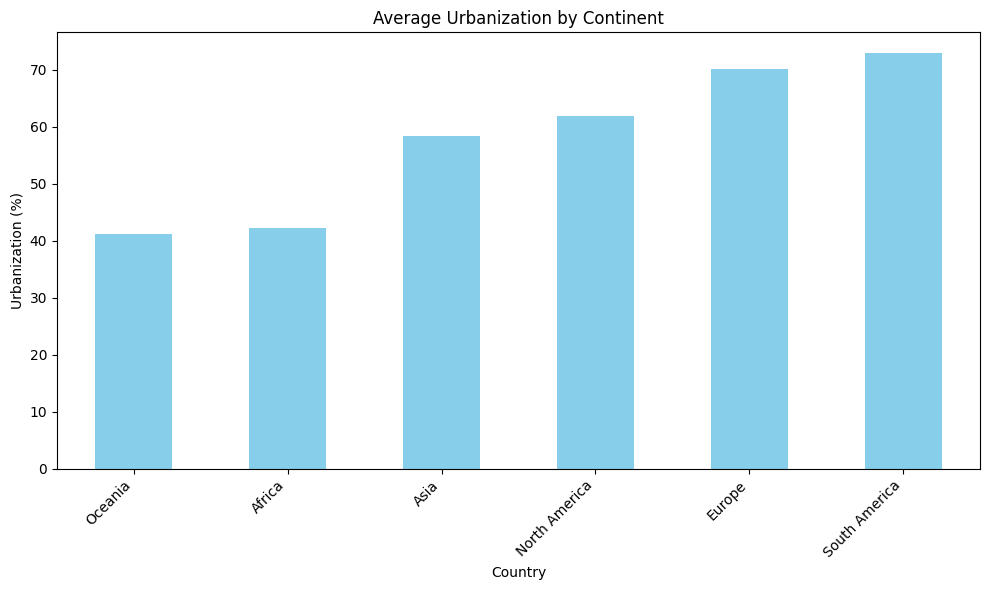

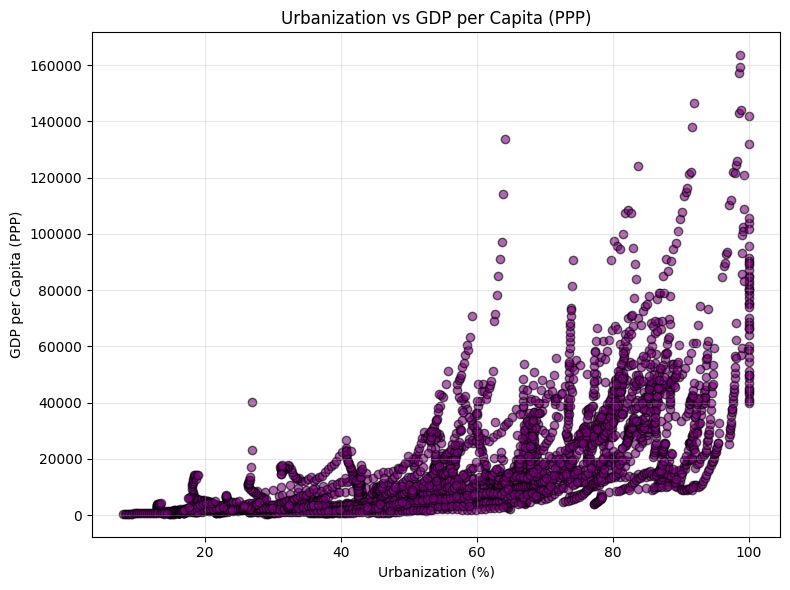

In [37]:
# Ploting a scatter plot for Urbanization rate by different continents
avg_urbanization = df_merged.groupby('Continent')['Urbanization'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_urbanization.plot(kind='bar', color='skyblue', title="Average Urbanization by Continent")
plt.ylabel('Urbanization (%)')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## urbaniuation differs by continent


# Ploting a scatter plot for Urbanization rate vs GDP_PPP
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['Urbanization'], df_merged['GDP_PPP'], alpha=0.6, color='purple', edgecolor='black')
plt.title('Urbanization vs GDP per Capita (PPP)')
plt.xlabel('Urbanization (%)')
plt.ylabel('GDP per Capita (PPP)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## there is high variation in the urbanization rate and a countries' GDP_PPP


# 2. Simple OLS regression


Here, we first observe the association between the dependet variable (log) GDP_PPP and AvYearsSchooling.



In [38]:
## In a previous regression plot, we saw that it would be reasonable to model the trend of GDP_PPP as a logarithmic function.
# Here, we observe both relations. All terms are coefficients are still significant, the R² increases, indicating that the the logarithmic function is able to predict the available data better.
# In addition, we estimate roboust standard errors clustered by country to account for the multiple data of one country in the dataset. -> accounting for heteroscedasticity. Variance between same countries will not be independent..
# using robust standard errors increases the the standard error. The Association of AvYearsSchooling on (Log) GDP_PPP remains significant.
reg1 = pf.feols("GDP_PPP~ AvYearsSchooling", data=df_merged)
reg2 = pf.feols("GDP_PPP~ AvYearsSchooling", data=df_merged, vcov={"CRV1":"Country"})
reg20 = pf.feols("Log_GDP_PPP~ AvYearsSchooling", data=df_merged)
reg21 = pf.feols("Log_GDP_PPP~ AvYearsSchooling", data=df_merged, vcov={"CRV1":"Country"})
pf.etable([reg1, reg2, reg20, reg21], scientific_notation=False)


# using robust standard errors increases the the standard error. But the Association of AvYearsSchooling on (Log) GDP_PPP remains significant.
# Intercept: Since Average Years of Schooling are never zero in the dataset (and also really unlikely in reality), there is no meaningful information
# AvYearsSchooling: for small to moderate coefficients we can approximate log as a percentage increase per 1 unit of independent variable... here, one year increase in average schooling would suggest a 29% increase in GDP per capita (being highly significant)
# Standard errors are small even when controlling for country-level clustered robust standard errors.
# R² increases by using Log_GDP_PPP

GT(_tbl_data=  level_0           level_1                             0  \
0    coef  AvYearsSchooling     3636.258*** <br> (84.280)   
1    coef         Intercept  -11590.552*** <br> (744.775)   
2   stats      Observations                          3586   
3   stats         S.E. type                           iid   
4   stats     R<sup>2</sup>                         0.342   

                               1                      2                      3  
0     3636.258*** <br> (303.707)  0.290*** <br> (0.004)  0.290*** <br> (0.014)  
1  -11590.552*** <br> (1892.195)  6.790*** <br> (0.033)  6.790*** <br> (0.122)  
2                           3586                   3586                   3586  
3                    by: Country                    iid            by: Country  
4                          0.342                  0.632                  0.632  , _body=<great_tables._gt_data.Body object at 0x785d0b8635e0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x785d0b860190>, _spanners=Spanners([SpannerInfo(spanner_id='GDP_PPP', spanner_level=1, spanner_label='GDP_PPP', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None), SpannerInfo(spanner_id='Log_GDP_PPP', spanner_level=1, spanner_label='Log_GDP_PPP', spanner_units=None, spanner_pattern=None, vars=['2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x785d0b861f30>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scs

In [39]:
# this is the simple linear regression of Log_GDP_PPP on AvYearsSchooling (with clustered errors by country)
reg21 = pf.feols("Log_GDP_PPP~ AvYearsSchooling", data=df_merged, vcov={"CRV1":"Country"})
pf.etable([reg21], scientific_notation=False)

## (cp. above)
# the coefficient of AvYearsSchooling is highly significant. On average, one additiona year of Average schooling predicts an increase in Log_GDP_PPP by 29%
# standarde error terms are moderate, so we have rather narow error bands, with (for a 5%-significance level) worst being around 26,156% and best around 31,644%
  #it shows that even out of sample, our predictions will be significant
  #(probably also because of good sample size)
# R² is moderate to high
# although the coeffcient is siginificant and the R² high, it is likely that there are omitted variables that (drive the relation?)


GT(_tbl_data=  level_0           level_1                      0
0    coef  AvYearsSchooling  0.290*** <br> (0.014)
1    coef         Intercept  6.790*** <br> (0.122)
2   stats      Observations                   3586
3   stats         S.E. type            by: Country
4   stats     R<sup>2</sup>                  0.632, _body=<great_tables._gt_data.Body object at 0x785d0b851780>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x785d0b8dbf10>, _spanners=Spanners([SpannerInfo(spanner_id='Log_GDP_PPP', spanner_level=1, spanner_label='Log_GDP_PPP', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x785d0b850ee0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=T

In [40]:
#### Brainstorming/Notes/Thoughts

## since we have observational data, it is really hard to make any causal claims though...
# having the panel data over several years improves our prediction since we have more observations.
    # (Later we can use the panel data for fixed effects on years and countires, to control for the constant things inside time, like economic shocks for years and culture for countries)
## this would be only causal, if AvYearsSchooling would capture all the drivers of GDP. This is highly unlikely! In the correlation table we saw that our proxis are correlated with the independent variable.
    # we likely have biased upward biased estimates, thereby overestimating the effect of AvYearsSchooling on GDP...
    # to decrease the size of the omitted variable bias we include some (good) control variables.

    # Good vs bad control variables ... they are bad if they are themselves affected by GDP..."good control variables are fixed when the variable of interest is determined such thaat they cannot be affected by this variable"
    # variables in data set: unemployment rate, life expectancy, Urbanization, incomegroup, educationlevel, Continent

# 3. Testing on Causality

We add different control variables (LifeExpectancy, UnemploymentRate and Urbanization)

In addition we control for country fixed effects and year fixed effects

In [41]:
# 1. for coming closer to causality, we check for different control variables to explain whether the association of AvYearsSchooling is not driven by other unobserved factors
# 2. we introduce several proxies
# LifeExp as a confounder -> could effect both avYearsSchooling and GDP
# Urbanization as a confounder -> proxy foe education and work access
# UnemploymentRate as a proxy for labor force participation and economic health in a country
# 3. We further add fixed effects on year and country to control for further unobservable but constant characteristics like the countries culture or economic shocks (-> removing time-invariant characteristics for country and year (e.g., based on culture, terrain, ))
    # (for this, we assume common trend assumption)
    # (we also assume linearity)
    # in addition, we need to assume that by adding those specific control variables we capture all drivers in the relationship of AvYearsSchooling on (log)GDP_PPP)
      #(otherwise we have e.g., omitted variable bias)

reg79 = pf.feols("Log_GDP_PPP~ AvYearsSchooling ", data=df_merged, vcov={"CRV1":"Country"})
reg80 = pf.feols("Log_GDP_PPP~ AvYearsSchooling | Year ", data=df_merged, vcov={"CRV1":"Country"})
reg90 = pf.feols("Log_GDP_PPP~ AvYearsSchooling + Urbanization | Year ", data=df_merged, vcov={"CRV1":"Country"})
reg82 = pf.feols("Log_GDP_PPP ~ AvYearsSchooling + LifeExp | Year", data=df_merged, vcov={"CRV1":"Country"})
reg83 = pf.feols("Log_GDP_PPP~ AvYearsSchooling + UnemploymentRate | Year", data=df_merged, vcov={"CRV1":"Country"})
reg313 = pf.feols("Log_GDP_PPP ~ AvYearsSchooling + UnemploymentRate + Urbanization + LifeExp | Year", data=df_merged, vcov={"CRV1":"Country"})
reg311 = pf.feols("Log_GDP_PPP ~ AvYearsSchooling + UnemploymentRate + Urbanization + LifeExp | Country + Year", data=df_merged, vcov={"CRV1":"Country"})
reg312 = pf.feols("Log_GDP_PPP ~ AvYearsSchooling + Urbanization + LifeExp | Country + Year", data=df_merged, vcov={"CRV1":"Country"})
pf.etable([reg79, reg80, reg313, reg311], scientific_notation=False)

## adding year fixed effects (model2), the R² goes up a bit -> some relation can be explained by time effects; the standard errors do not change too much and the coeffcient is still highly significant.
    # in further steps, we always try to use time fixed effects to account for the panel data design
# adding control variables (model3), the coefficient of AvYearsSchooling is still significant, but smaller. Standard errors are not too high; the R² increases substantially, implying that our model fits the data better
    # urbanization and lifeExp are significant and postive; some of the previously explained associaten was likely due to them;
# on model4 we add country fixed effects. Our coeffcient for AvYearsSchooling is no longer significant; the standard errors are huge. We not longer can say anything about the relation.
    # both is also true for Urbanization and LifeExp
    # Unemploymentrate suddenly becomes significant, and negatively related to Log_GDP_PPP; this is an expected relationship... however, we cannot make any claims and even our predictions migh be biased
    # the R² is huge. It may be that we overfitted the model...
# Model 3 might be thus "better" to use for predictions...
# However, since controlling for country fixed effects there is no longer any significance, it may be reasonable to go into lower levels
    # and explore the relation on regions/continents/etc. (since difference within countries are so little that relation disappears..)

# from the correlation heatmap we also saw rather high correlations... these could hint towards multicollinearity issue
# this, e.g., would disturb our unit interpretation since the assumption is we "hold all of the other independent variables constant".... which is then not achievable...


GT(_tbl_data=  level_0           level_1                      0                      1  \
0    coef  AvYearsSchooling  0.290*** <br> (0.014)  0.285*** <br> (0.015)   
1    coef  UnemploymentRate                                                 
2    coef      Urbanization                                                 
3    coef           LifeExp                                                 
4    coef         Intercept  6.790*** <br> (0.122)                          
5      fe           Country                      -                      -   
6      fe              Year                      -                      x   
7   stats      Observations                   3586                   3586   
8   stats         S.E. type            by: Country            by: Country   
9   stats     R<sup>2</sup>                  0.632                  0.639   

                       2                       3  
0  0.098*** <br> (0.016)     -0.036 <br> (0.027)  
1    -0.002 <br> (0.007)  -0.021*** <br> (0.004)  
2  0.020*** <br> (0.003)      0.002 <br> (0.006)  
3  0.051*** <br> (0.007)      0.004 <br> (0.006)  
4                                                 
5                      -                       x  
6                      x                       x  
7                   3586                    3586  
8            by: Country             by: Country  
9                  0.848                   0.984  , _body=<great_tables._gt_data.Body object at 0x785d13b4ffd0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x785d0bd3e680>, _spanners=Spanners([SpannerInfo(spanner_id='Log_GDP_PPP', spanner_level=1, spanner_label='Log_GDP_PPP', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x785d0bd3f970>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal

In [42]:
#### Brainstorming/Notes/Thoughts

## if multicollinearity issue here ... both direction and strength vary a lot depending on the changes in the model... also see above, high correlations among variables...
#in addition to very high standard erros -> multicollinearity typically leads to insignificance due to inflated standard errors
#(drawback: in an effort to deal with the multicollinearity issue, removing the control variable could also lead to omitted variable bias (might be if something first significant becomes then insignificant...)
# interesting might be the AvYearsSchooling and LifeExp -> the control variable is highly correlated, so changes in one will lead to changes in the other... This could be bad since independence assumption wouldnt hold
# In further analysis, adding other variables and employing a lasso-Regression could be interesting to try dealing with this multicollinearity question

In [43]:
# this table has the regressions for each control variable individually
pf.etable([reg79, reg80, reg90, reg82, reg83, reg313, reg311, reg312], scientific_notation=False)

## the case for UnemployementRate as a control variable is less clear here... individually, didn't have explaining association... but with fixed effects suddently significant

GT(_tbl_data=  level_0           level_1                      0                      1  \
0    coef  AvYearsSchooling  0.290*** <br> (0.014)  0.285*** <br> (0.015)   
1    coef      Urbanization                                                 
2    coef           LifeExp                                                 
3    coef  UnemploymentRate                                                 
4    coef         Intercept  6.790*** <br> (0.122)                          
5      fe           Country                      -                      -   
6      fe              Year                      -                      x   
7   stats      Observations                   3586                   3586   
8   stats         S.E. type            by: Country            by: Country   
9   stats     R<sup>2</sup>                  0.632                  0.639   

                       2                      3                      4  \
0  0.168*** <br> (0.017)  0.138*** <br> (0.021)  0.286*** <br> (0.015)   
1  0.027*** <br> (0.003)                                                 
2                         0.076*** <br> (0.009)                          
3                                                  -0.003 <br> (0.010)   
4                                                                        
5                      -                      -                      -   
6                      x                      x                      x   
7                   3586                   3586                   3586   
8            by: Country            by: Country            by: Country   
9                  0.794                  0.777                  0.639   

                       5                       6                    7  
0  0.098*** <br> (0.016)     -0.036 <br> (0.027)  -0.038 <br> (0.027)  
1  0.020*** <br> (0.003)      0.002 <br> (0.006)   0.001 <br> (0.006)  
2  0.051*** <br> (0.007)      0.004 <br> (0.006)   0.003 <br> (0.006)  
3    -0.002 <br> (0.007)  -0.021*** <br> (0.004)                       
4                                                                      
5                      -                       x                    x  
6                      x                       x                    x  
7                   3586                    3586                 3586  
8            by: Country             by: Country          by: Country  
9                  0.848                   0.984                0.982  , _body=<great_tables._gt_data.Body object at 0x785d0bd3c700>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='4', type=<ColInfoTypeEnum.default: 1>, column_label='(5)', column_align='center', column_width=None), ColInfo(var='5', type=<ColInfoTypeEnum.default: 1>, column_label='(6)', column_align='center', column_width=None), ColInfo(var='6', type=<ColInfoTypeEnum.default: 1>, column_label='(7)', column_align='center', column_width=None), ColInfo(var='7', type=<ColInfoTypeEnum.default: 1>, column_label='(8)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x785d0aac4ac0>, _spanners=Spanners([SpannerInfo(spanner_id='Log_GDP_PPP', spanner_level=1, spanner_label='Log_GDP_PPP', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3', '4', '5', '6', '7'], built=None)]), _heading=Hea

In [44]:
#plotting the summary table for the etable above to observe the t-value
pf.summary([reg79, reg80, reg313, reg311])

  # t-values must be significantly different from zero; t-value 2 and higher is highly significant
  # the R2 within is low in the last model -> so it's really bad in accounting for changes in GDP within the different countries... bit its good in capturing changes between countries..

###

Estimation:  OLS
Dep. var.: Log_GDP_PPP, Fixed effects: 0
Inference:  CRV1
Observations:  3586

| Coefficient      |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:-----------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Intercept        |      6.790 |        0.122 |    55.874 |      0.000 |  6.549 |   7.030 |
| AvYearsSchooling |      0.290 |        0.014 |    20.922 |      0.000 |  0.263 |   0.318 |
---
RMSE: 0.742 R2: 0.632 
###

Estimation:  OLS
Dep. var.: Log_GDP_PPP, Fixed effects: Year
Inference:  CRV1
Observations:  3586

| Coefficient      |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:-----------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| AvYearsSchooling |      0.285 |        0.015 |    19.577 |      0.000 |  0.256 |   0.314 |
---
RMSE: 0.735 R2: 0.639 R2 Within: 0.62 
###

Estimation:  OLS
Dep. var.: Log_GDP_PPP, Fixed effects: Year
Inferenc

# 4. Testing for different Subgroups

Here we want to get a more differentiated view on our research question and explore the relation of Log_GDP_PPP on AvYearsSchooling for different continents and later, for a regional subgroup of countries.

In [45]:
# exploring the association(s) for different continents
reg_region1 = pf.feols("Log_GDP_PPP ~ AvYearsSchooling | Year", data=df_merged, vcov={"CRV1":"Country"})
reg_region2 = pf.feols("Log_GDP_PPP ~ AvYearsSchooling | Continent + Year", data=df_merged, vcov={"CRV1":"Country"})
reg_region3 = pf.feols("Log_GDP_PPP ~ AvYearsSchooling * Continent | Continent + Year", data=df_merged, vcov={"CRV1":"Country"})
reg_region4 = pf.feols("Log_GDP_PPP ~ AvYearsSchooling * Continent + Urbanization + LifeExp + UnemploymentRate | Continent + Year", data=df_merged, vcov={"CRV1":"Country"})
pf.etable([reg_region1, reg_region2, reg_region3, reg_region4], scientific_notation=True)

# AvYearsSchooling
# - positive and significant relationship between schooling and GDP is consistent across all models
# Interaction Effects
# - significant regional disparities in how education translates to economic growth for Asia and South America
# Urbanization and Life Expectancy
# - strong, significant positive effects demonstrate importance of urban development and health policies for economic growth
# Model Improvement
# - adding continent fixed effects, interaction terms and additional controls progressively improves the model's explanatory power

/usr/local/lib/python3.10/dist-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['Continent[T.Asia]', 'Continent[T.Europe]', 'Continent[T.North America]', 'Continent[T.Oceania]', 'Continent[T.South America]'].
            The variables are dropped from the model.
            
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['Continent[T.Asia]', 'Continent[T.Europe]', 'Continent[T.North America]', 'Continent[T.Oceania]', 'Continent[T.South America]'].
            The variables are dropped from the model.
            
  warnings.warn(


GT(_tbl_data=   level_0                                      level_1  \
0     coef                             AvYearsSchooling   
1     coef           AvYearsSchooling:Continent[T.Asia]   
2     coef         AvYearsSchooling:Continent[T.Europe]   
3     coef  AvYearsSchooling:Continent[T.North America]   
4     coef        AvYearsSchooling:Continent[T.Oceania]   
5     coef  AvYearsSchooling:Continent[T.South America]   
6     coef                                 Urbanization   
7     coef                                      LifeExp   
8     coef                             UnemploymentRate   
9       fe                                         Year   
10      fe                                    Continent   
11   stats                                 Observations   
12   stats                                    S.E. type   
13   stats                                R<sup>2</sup>   

                        0                      1                      2  \
0   0.285*** <br> (0.015)  0.251*** <br> (0.023)  0.302*** <br> (0.034)   
1                                                   -0.095 <br> (0.058)   
2                                                   -0.098 <br> (0.063)   
3                                                   -0.025 <br> (0.043)   
4                                                   -0.028 <br> (0.072)   
5                                                  -0.128* <br> (0.052)   
6                                                                         
7                                                                         
8                                                                         
9                       x                      x                      x   
10                      -                      x                      x   
11                   3586                   3586                   3586   
12            by: Country            by: Country            by: Country   
13                  0.639                  0.675                  0.682   

                         3  
0    0.171*** <br> (0.027)  
1   -0.127*** <br> (0.036)  
2      -0.063 <br> (0.046)  
3      -0.014 <br> (0.038)  
4     -0.112* <br> (0.047)  
5   -0.210*** <br> (0.060)  
6    0.021*** <br> (0.003)  
7    0.054*** <br> (0.007)  
8      -0.010 <br> (0.008)  
9                        x  
10                       x  
11                    3586  
12             by: Country  
13                   0.867  , _body=<great_tables._gt_data.Body object at 0x785d0becc760>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x785d139dd870>, _spanners=Spanners([SpannerInfo(spanner_id='Log_GDP_PPP', spanner_level=1, spanner_label='Log_GDP_PPP', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x785d0b8e50c0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value

In [46]:
## Now we test the association of AvYearsSchooling and Log_GDP_PPP for a certain region of countires (Eastern Europe) and try to employe a dif-and-dif approach based on Croatias' joining of the Eu in 2013

# Relevant countries
countries = ['Croatia', 'Serbia', 'Bosnia and Herzegovina', 'Montenegro',
             'North Macedonia', 'Albania', 'Ukraine', 'Moldova', 'Belarus', 'Kosovo']

# Filter data for selected countries and the year range
data_eastern_europe = df_merged[(df_merged['Country'].isin(countries))].copy()

# Variables for DiD
data_eastern_europe['Treatment'] = (data_eastern_europe['Country'] == 'Croatia').astype(int)
data_eastern_europe['Post_2013'] = (data_eastern_europe['Year'] >= 2013).astype(int)
data_eastern_europe['EU_Croatia'] = data_eastern_europe['Treatment'] * data_eastern_europe['Post_2013']

# Model with control variable
eastern_europe_model1 = pf.feols('Log_GDP_PPP ~ AvYearsSchooling', data=data_eastern_europe)

# DiD variables to check the treatment effect
eastern_europe_model2 = pf.feols('Log_GDP_PPP ~ AvYearsSchooling + Treatment + Post_2013 + EU_Croatia', data=data_eastern_europe)

# Model with additional control variables
eastern_europe_model3 = pf.feols('Log_GDP_PPP ~ AvYearsSchooling + Treatment + Post_2013 + EU_Croatia + LifeExp +Urbanization + UnemploymentRate',data=data_eastern_europe)

# Model with fixed effects for years
eastern_europe_model4 = pf.feols('Log_GDP_PPP ~ Treatment + Post_2013 + EU_Croatia + AvYearsSchooling + LifeExp + Urbanization + UnemploymentRate | Year',data=data_eastern_europe,vcov={"CRV1": "Country"} )

#show the results
pf.etable([eastern_europe_model1, eastern_europe_model2, eastern_europe_model3, eastern_europe_model4])


# Summary of Regression Table:
# 1. The Treatment variable (Croatia) is consistently positive and significant showing Croatia's GDP per capita was ~70-76% higher than the control group pre-2013.
# 2. The Post_2013 variable reflects significant global GDP growth (57-61%) after 2013, but it is dropped in Model 4 due to collinearity with year fixed effects.
# 3. The EU_Croatia interaction term becomes negative and significant in Model 4 (-0.219), suggesting Croatia’s GDP grew ~21.9% slower than the control group post-EU membership.
# 4. Structural controls like Urbanization and Education (AvYearsSchooling) are significant drivers of GDP in Models 2 and 3, but their effects diminish when year fixed effects are included in Model 4.
# 5. Model 4 has the highest R² (0.947), year fixed effects account for global time-specific trends.


/usr/local/lib/python3.10/dist-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['Post_2013'].
            The variables are dropped from the model.
            
  warnings.warn(


GT(_tbl_data=   level_0           level_1                      0                      1  \
0     coef  AvYearsSchooling  0.207*** <br> (0.025)  0.100*** <br> (0.021)   
1     coef         Treatment                         0.709*** <br> (0.102)   
2     coef         Post_2013                         0.611*** <br> (0.062)   
3     coef        EU_Croatia                           -0.175 <br> (0.156)   
4     coef           LifeExp                                                 
5     coef      Urbanization                                                 
6     coef  UnemploymentRate                                                 
7     coef         Intercept  7.156*** <br> (0.267)  7.922*** <br> (0.209)   
8       fe              Year                      -                      -   
9    stats      Observations                    176                    176   
10   stats         S.E. type                    iid                    iid   
11   stats     R<sup>2</sup>                  0.281                  0.620   

                        2                      3  
0   0.148*** <br> (0.025)     0.072 <br> (0.038)  
1   0.478*** <br> (0.079)  0.765*** <br> (0.072)  
2   0.343*** <br> (0.053)                         
3     -0.187 <br> (0.112)  -0.219** <br> (0.051)  
4   0.075*** <br> (0.009)     0.016 <br> (0.020)  
5   0.013*** <br> (0.002)    0.014* <br> (0.005)  
6     -0.000 <br> (0.005)     0.015 <br> (0.008)  
7     1.300* <br> (0.648)                         
8                       -                      x  
9                     176                    176  
10                    iid            by: Country  
11                  0.810                  0.947  , _body=<great_tables._gt_data.Body object at 0x785d0bd88190>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x785d0bd8aa40>, _spanners=Spanners([SpannerInfo(spanner_id='Log_GDP_PPP', spanner_level=1, spanner_label='Log_GDP_PPP', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x785d0bd8a710>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans

# 5. Summary, limitations, further research

Cautiously stating, on average, increasing Average Years of Schooling can predict higher (log) GDP per capita.

 However, although this relation was shown to be significant, only a small number of control variables (life expectancy, urbanization, unemployment rate) were included - thereby there is likely still omitted variable bias. The stated relation is thereby not causal and the true effect will likely deviate.

Exploring the question on different regional subgroups can be fruitful and may give better predications and provide the chance to make more nuanced causal statements.

In addition, adding more variables and using ML methods would be an alternative approach to explore the causel relationship.

So called "Dynamic panel" approaches with lagged variables could be also interesting for further exploration.



Possible Data to explore:

*Health and Demographics*

Infant Mortality Rate
Population Age Structure
(proportion of working-age population)

*Politics*

Political Stability
Ease of Doing Business
Corruption Index

*Geospatial Data*

Latitude

# 6. Appendix - Some considerations and testing of ML on this dataset

In [47]:
## Should we try out decision trees and random forests on the data set?
    # -> with this dataset not reasonable ... too little independent variables... might become more interesting for more variables and on regions/continents
    # in addition, since only numerical values can be used here, per country, we only have 23 observations...
    # on contrary, we will have more then 150 variables (since each country will be one, and each other dummy will be one)... -> results will be difficult to interpret...
    # on a dataset with more variables, decision tree could be an interesting method to help understand which features are most important in predicting GDP_PPP. It could also help to visually identify patterns and relationships.


In [48]:
# One further research approach for this dataset could be:
###  Country-Level aggregates... trying with certain category features (e.g., by region averages (culture), economic indicator(wealth))  -> so excluding country, but adding/keeping region...
# Here decision tree can help to understand which features are most important in predicting GDP_PPP. ou can also visually analyze the tree to identify patterns and relationships in the data.


In [49]:
#trying out to divide the datasat (numerical values) into train-test sample with split 80-20
# # -> not including any non-numerical variable -> in actual analysis, we would covert this into dummies before and then include (as reasonable/ based on specific research scope)

y= df_merged["Log_GDP_PPP"]
X= df_merged.drop(columns=["GDP_PPP", "Log_GDP_PPP", "Country", "educationLevel", "Continent", "IncomeGroup"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression   # the R² in-sample -> high
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.839937783332773

In [51]:
model.score(X_test, y_test)                         # the R² out-of-sample -> high(er)
# so a model with UnemploymentRate, LifeExpactancy, Urbanization, and Years would be quite well in predicting the relation of AvYearsSchooling and Log_GDP_PPP even out of sample

0.8458622826597209

In [52]:
X_test.shape   # if we would do it including, e.g.,  countries, the number of (dummy) variables would be huge... and per dummy, there would also not be so many observations....

(2869, 5)

In [53]:
## computing random forest on data set; we have 500 trees, and especially on random features - taking number of features and squaring it as a rule; then computing the R² for that forest

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500, max_features="sqrt", random_state=181).fit(X_train, y_train)
print("R²: ", round(r2_score(y_test, forest.predict(X_test)),3))    # R² on test data -> high

R²:  0.93


In [54]:
y2= df_merged["Log_GDP_PPP"]
X2= df_merged[["AvYearsSchooling","Urbanization","LifeExp","UnemploymentRate","Year"]]

In [55]:
# trying out lass regression on a subset of variables
from sklearn.linear_model import LassoCV
lasso =LassoCV(cv=5, random_state=156).fit(X_train, y_train)

print("R²: ", round(r2_score(y_test, lasso.predict(X_test)),3))      # the R² for the lasso regression

print("Alpha", lasso.alpha_)                                           #the estimated best alpha

coefs=pd.Series(lasso.coef_,index=X.columns)
print(pd.Series(lasso.coef_,index=X_train.columns).sort_values())

## lasso regressions decides to keep all variables, as they seem to add additional explanatory value... so we cannot understand based on this, which variable we could exclude above for the multicollinearity issue...
#(R² is high, so these variables seem to have substantial predictive power for the test data...)
# keeping all is kinda counterintuitve and also different from the regression above where some variables were Unemployment was often insignificant...
    # it could support Model 3 ... (in terms of PREDICTION anyway)

R²:  0.846
Alpha 0.03299098164295953
UnemploymentRate   -0.000000
Year                0.014743
Urbanization        0.018584
LifeExp             0.047788
AvYearsSchooling    0.105924
dtype: float64


<Axes: >

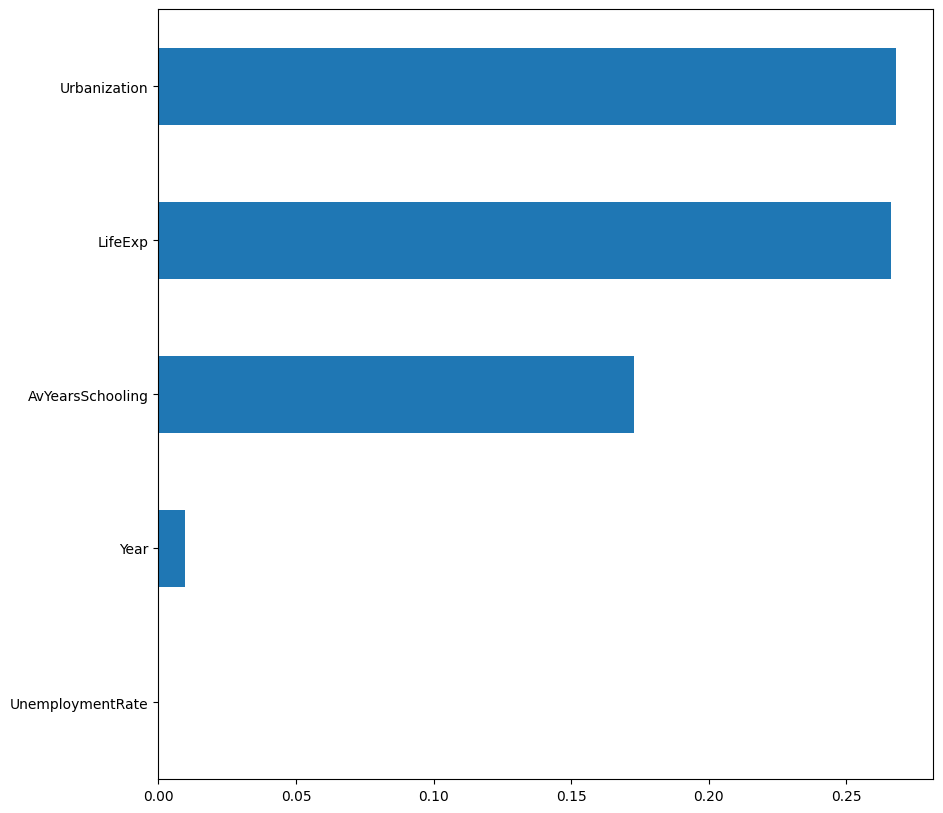

In [56]:
#checking the importance of different features (!! not whole dataset used in previous regressions!!)
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(lasso, X_test, y_test, random_state=181)
plt.figure(figsize=(10,10))
pd.Series(perm_importance.importances_mean, index=X_test.columns).sort_values().plot(kind="barh")

# this kinda indicates that LifeExp and urbanization iare the most important explanatory variables... (of course this is incomplete, e.g., no country dimension!!!).
# as suspected by our previous regressions, unemployment rate seems indeed not to be adding explanatory power...